In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
import pandas as pd

In [16]:
def plot_file(c,t,id,fig_num,suptitle):
    df = pd.read_csv(f'output2/{t}_{id}.csv')
    Y = fft(df[c])
    N = len(df[c])
    n = np.arange(N)
    fs = 1.0/32.0
    # print(n)
    freq = np.fft.fftfreq(N, fs)
 
    # print(freq)
    plt.figure(fig_num,figsize = (16, 4))
    plt.suptitle(f'{suptitle}')
    plt.subplot(211)
    plt.title(f'Original data of {c}')
    plt.plot( n,df[c], 'b')
    plt.xlabel('Times')
    plt.ylabel('Amplitude ')
    plt.xlim(0, 2000)

    # plt.subplot(222)
    # plt.plot(1/N*2*np.abs(Y))
    # plt.title("Original data")
    # plt.xlabel('Freq (Hz)')
    # plt.ylabel('FFT Amplitude |X(freq)|')
    # plt.xlim(0, 2)

    # print(freq)
    # Xác định chỉ mục của tần số 0.13 và 0.7
    index_0_13 = np.where(freq >= 0)[0][0]
    index_07 = np.where(freq >= 1)[0][0]
    # print(index_0_13)
    # print(index_07)
    fourier_filtered = Y.copy()
    fourier_filtered[:index_0_13] = 0
    fourier_filtered[index_07:] = 0
    # print(fourier_filtered)

    data_filtered = ifft(fourier_filtered)
    # data_filtered.to_csv(f'output2_filtered/{t}_filtered_{id}.csv')
# Lọc Fourier

    plt.subplot(212)
    plt.plot( n, data_filtered.real, 'b')
    plt.title(f'After filter of {c}')
    plt.xlabel('Times')
    plt.ylabel(' Amplitude ')
    plt.xlim(0, 2000)


    # plt.subplot(224)
    # plt.plot(1/N*2*np.abs(fourier_filtered))
    # plt.title("After filter")
    # plt.xlabel('Freq (Hz)')
    # plt.ylabel('FFT Amplitude |X(freq)|')
    # plt.xlim(0, 2)
    # plt.show()
    
    return np.round(data_filtered.real, 2)



In [21]:
test = pd.read_csv(f'output2_filtered/AN_filtered_1.csv')
# test.columns[2] = "STT"
test.rename(columns={'Unnamed':'STT'}, inplace=True)

np.round
print(test)


      AccelX  AccelY  AccelZ  GyroX  GyroY  GyroZ
0        9.4    0.30    4.38  -0.11   0.05  -0.01
1        9.4    0.30    4.38  -0.11   0.05  -0.01
2        9.4    0.31    4.38  -0.11   0.05  -0.01
3        9.4    0.31    4.38  -0.11   0.05  -0.01
4        9.4    0.32    4.38  -0.11   0.05  -0.01
...      ...     ...     ...    ...    ...    ...
1995     9.4    0.28    4.39  -0.11   0.05  -0.01
1996     9.4    0.28    4.38  -0.11   0.05  -0.01
1997     9.4    0.29    4.38  -0.11   0.05  -0.01
1998     9.4    0.29    4.38  -0.11   0.05  -0.01
1999     9.4    0.30    4.38  -0.11   0.05  -0.01

[2000 rows x 6 columns]


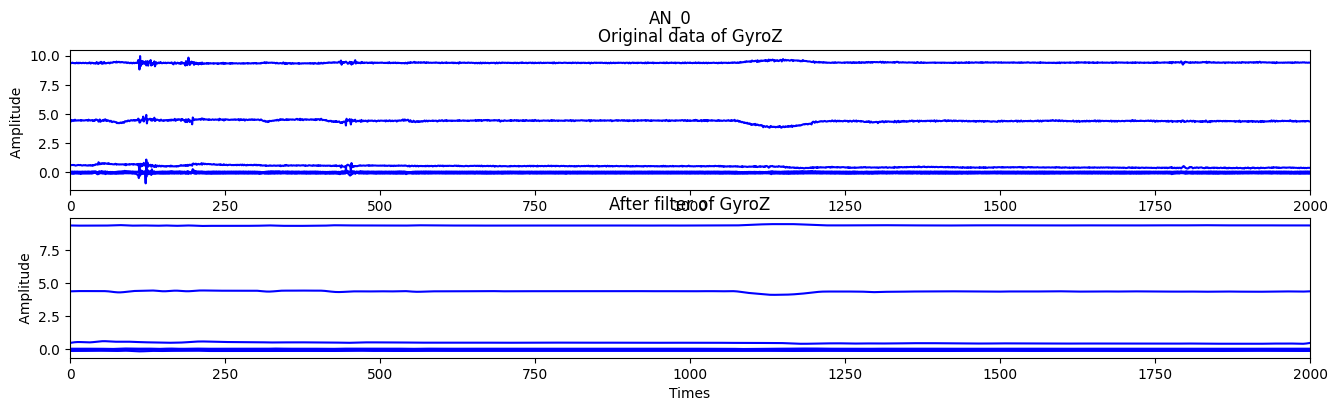

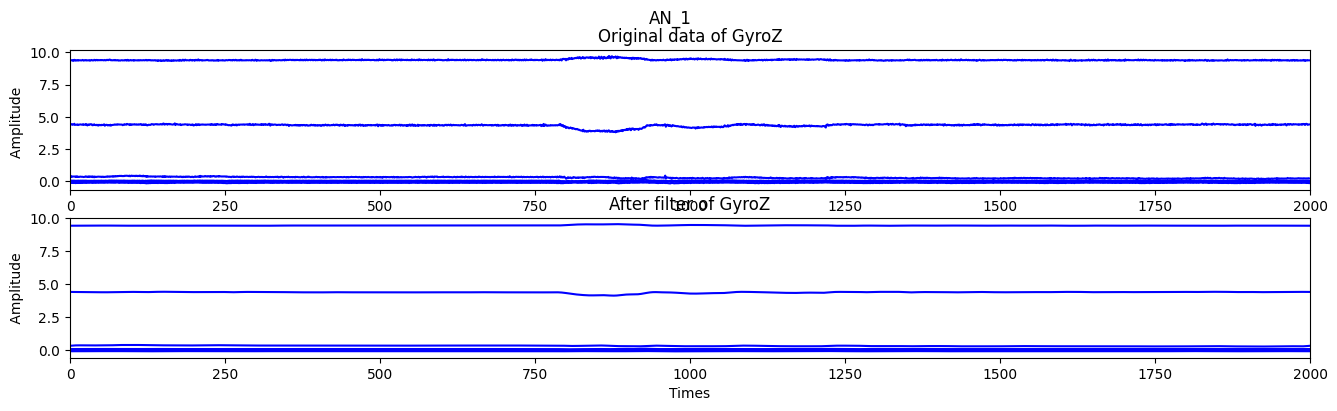

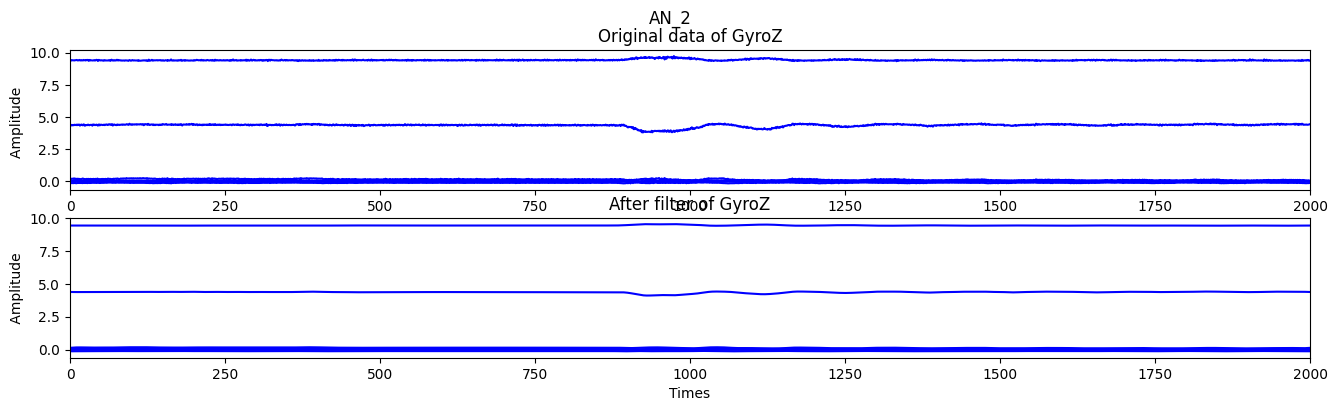

In [18]:
columns = ["AccelX", "AccelY", "AccelZ", "GyroX", "GyroY", "GyroZ"]
t = "AN"
for i in range(3):
    df = pd.DataFrame()
    for c in columns:
        df[c] =  plot_file(c,t,i,i, f'{t}_{i}')
    df.to_csv(f'output2_filtered/{t}_filtered_{i}.csv')
   
